In [1]:
# Importing all necessary libraries 
import cv2 
import os 
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torch.nn as nn
from torch.autograd import Variable

In [5]:
# Read the video from specified path 
'''
cam = cv2.VideoCapture("/home/shubham/speedchallenge/data/test.mp4") 

try: 
    
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 

# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 

# frame 
currentframe = 0

while(True): 
    
    # reading from frame 
    ret,frame = cam.read() 

    if ret: 
        # if video is still left continue creating images 
        name = '/media/shubham/New Volume/Dataset/speed/data_test/frame' + str(currentframe) + '.png'
        print ('Creating...' + name) 

        # writing the extracted images 
        cv2.imwrite(name, frame) 

        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break

# Release all space and windows once done 
cam.release() 
cv2.destroyAllWindows() 
'''
# not needed now

'\ncam = cv2.VideoCapture("/home/shubham/speedchallenge/data/test.mp4") \n\ntry: \n    \n    # creating a folder named data \n    if not os.path.exists(\'data\'): \n        os.makedirs(\'data\') \n\n# if not created then raise error \nexcept OSError: \n    print (\'Error: Creating directory of data\') \n\n# frame \ncurrentframe = 0\n\nwhile(True): \n    \n    # reading from frame \n    ret,frame = cam.read() \n\n    if ret: \n        # if video is still left continue creating images \n        name = \'/media/shubham/New Volume/Dataset/speed/data_test/frame\' + str(currentframe) + \'.png\'\n        print (\'Creating...\' + name) \n\n        # writing the extracted images \n        cv2.imwrite(name, frame) \n\n        # increasing counter so that it will \n        # show how many frames are created \n        currentframe += 1\n    else: \n        break\n\n# Release all space and windows once done \ncam.release() \ncv2.destroyAllWindows() \n'

In [2]:
file = '/media/shubham/New Volume/Dataset/speed/data/'

In [3]:
def rgb2gray(image):
    gray = 0.2989*image[:,:,0]+ 0.5870*image[:,:,1]+ 0.1140*image[:,:,2]
    return gray

In [43]:
train_imgs = []
for i in range(100):
    img = mpimg.imread(file+'frame'+str(i)+'.png')
    gray = rgb2gray(img)
    img = np.array(gray)
    train_imgs.append(img)

In [44]:
print(type(train_imgs))

<class 'list'>


In [6]:
np.max(train_imgs[0])

0.99990004

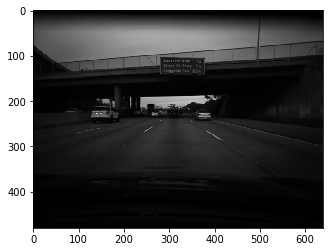

In [7]:
img = train_imgs[0]
imgplot = plt.imshow(img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

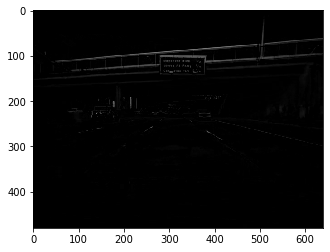

In [8]:
diff_img = train_imgs[0] - train_imgs[1]
imgplot = plt.imshow(diff_img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [9]:
np.mean(diff_img)*20

0.037629762664437294

In [10]:
speed_file = open("/home/shubham/speedchallenge/data/train.txt","r")

In [11]:
speed_file.seek(0)
speed = speed_file.read()

In [12]:
speed = speed.splitlines()

In [13]:
est_speed = []
start = float(speed[0])
est_speed.append(start)
for i in range(99):
    diff_img = train_imgs[i+1] - train_imgs[i]
    est = np.mean(diff_img)*20
    start += est
    est_speed.append(start)

In [14]:
speed = np.array(speed,dtype=np.float32)

In [15]:
speed

array([28.10557 , 28.10557 , 28.106527, ...,  2.292917,  2.2606  ,
        2.206759], dtype=float32)

In [16]:
est_speed - speed[:100]

array([-8.39477540e-07, -3.76306021e-02, -1.35196110e-01, -2.39633435e-01,
       -3.44423521e-01, -4.55270489e-01, -5.56709056e-01, -6.93381819e-01,
       -7.94918952e-01, -9.80998923e-01, -1.10151481e+00, -1.22394143e+00,
       -1.37867088e+00, -1.39213689e+00, -1.42618173e+00, -1.46777666e+00,
       -1.44373229e+00, -1.45127749e+00, -1.43150846e+00, -1.38719354e+00,
       -1.46446474e+00, -1.46538263e+00, -1.43132110e+00, -1.37572407e+00,
       -1.45350629e+00, -1.37149098e+00, -1.23465298e+00, -1.27564398e+00,
       -1.16099595e+00, -9.84828843e-01, -9.46985980e-01, -6.07911942e-01,
       -4.43941835e-01, -3.22372744e-01,  4.68760638e-02,  2.74884006e-01,
        5.18004155e-01,  9.82552050e-01,  1.28466472e+00,  1.65204462e+00,
        2.27869250e+00,  2.76907378e+00,  3.38850332e+00,  3.94523208e+00,
        4.61440837e+00,  4.81198667e+00,  5.10372843e+00,  5.25531538e+00,
        5.34997726e+00,  5.53581578e+00,  5.62225316e+00,  5.72749200e+00,
        5.90302306e+00,  

In [45]:

train_imgs = np.expand_dims(train_imgs, axis=1)
train_imgs.shape

(100, 1, 480, 640)

In [46]:
train_dataset = torch.tensor(train_imgs)

In [47]:
batch_size = 1
n_iters =200
num_epochs = n_iters/(len(train_dataset)/batch_size)

num_epochs = int(num_epochs)
print(num_epochs)

2


In [48]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = False)

In [90]:
class CNNModel(nn.Module):

    def __init__(self):

        super(CNNModel,self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels = 1,out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels = 16,out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.cnn3 = nn.Conv2d(in_channels = 32,out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.cnn4 = nn.Conv2d(in_channels = 64,out_channels = 128, kernel_size = 3, stride = 1, padding = 1)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(128*30*40,200)
        self.fc2 = nn.Linear(400,50)
        self.fc3 = nn.Linear(50,1)
    
    def forward(self,x,y):

        out1 = self.cnn1(x)
        out1 = self.relu(out1)
        out1 = self.maxpool1(out1)
        
        out2 = self.cnn1(y)
        out2 = self.relu(out2)
        out2 = self.maxpool1(out2)

        out1 = self.cnn2(out1)
        out1 = self.relu(out1)
        out1 = self.maxpool1(out1)
        
        out2 = self.cnn2(out2)
        out2 = self.relu(out2)
        out2 = self.maxpool1(out2)
        
        out1 = self.cnn3(out1)
        out1 = self.relu(out1)
        out1 = self.maxpool1(out1)
        
        out2 = self.cnn3(out2)
        out2 = self.relu(out2)
        out2 = self.maxpool1(out2)
        
        out1 = self.cnn4(out1)
        out1 = self.relu(out1)
        out1 = self.maxpool1(out1)
        
        out2 = self.cnn4(out2)
        out2 = self.relu(out2)
        out2 = self.maxpool1(out2)
        
        out1 = out1.view(out1.size(0),-1)
        out2 = out2.view(out2.size(0),-1)
        
        out1 = self.fc1(out1)
        out2 = self.fc1(out2)
        
        out1 = self.relu(out1)
        out2 = self.relu(out2)
        
        out  = torch.cat((out1,out2),dim = 1)
        out  = self.fc2(out)
        out  = self.fc3(out)

        return out



In [91]:
model = CNNModel()

In [92]:
criterion = nn.MSELoss()

In [93]:
learning_rate = 0.001

optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [103]:
iter = 0
prev = Variable(torch.tensor(np.ones((1,1,480,640),dtype=np.float32)))
start = Variable(torch.tensor(0.0))

for epoch in range(num_epochs):

    for i , (images) in enumerate(train_loader):

        if i==99:
            break

        images = Variable(images)

        labels = Variable(torch.tensor(speed[i]))

        print(images.shape)

        optimizer.zero_grad()

        

        outputs = model(images,prev)

        
        prev = images

        loss = criterion(outputs,labels)
        print(loss)

        loss.backward()

        optimizer.step()

        

        iter +=1

        

        

        if iter % 500 == 0:

            correct = 0

            total = 0

            for images,labels in test_loader:

                images = Variable(images)

                outputs = model(images)

                _,predicted = torch.max(outputs.data,1)

                total +=labels.size(0)

                correct += (predicted==labels).sum()

            accuracy = 100.00*correct/total

            print('Iteration: {}, Loss : {}, Accuracy: {} '.format(iter,loss.data,accuracy))
        
        

torch.Size([1, 1, 480, 640])
tensor(793.7059, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(626.1044, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(297.7665, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.3526, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(626.7313, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(76.4666, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(18.1365, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(124.1134, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(199.6430, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(229.2912, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(219.9982, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(185.2634, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(130.9118, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(64.6067, grad_fn=<M

torch.Size([1, 1, 480, 640])
tensor(0.3957, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.4358, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.2679, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.0657, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.0251, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.1734, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.2678, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.1640, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.1001, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.0003, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.0725, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.1048, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.1620, grad_fn=<MseLossBackward>)
torch.Size([1, 1, 480, 640])
tensor(0.0998, grad_fn=<MseLossBackward>)
torch.

In [97]:
a = np.ones((1,2,2),dtype=np.float32)
a

array([[[1., 1.],
        [1., 1.]]], dtype=float32)

In [ ]:
model.eval()
acc = 0
prev = Variable(torch.tensor(np.ones((1,1,480,640),dtype=np.float32)))
start = Variable(torch.tensor(0.0))
for i, (images) in enumerate(train_loader):

    images = Variable(images)

    outputs = model(images,prev)
    
    prev = images

    predicted = outputs[0][0]
    labels = Variable(torch.tensor(speed[i]))
    
    acc += (labels-predicted)*(labels-predicted)

print('Acc: ',acc)